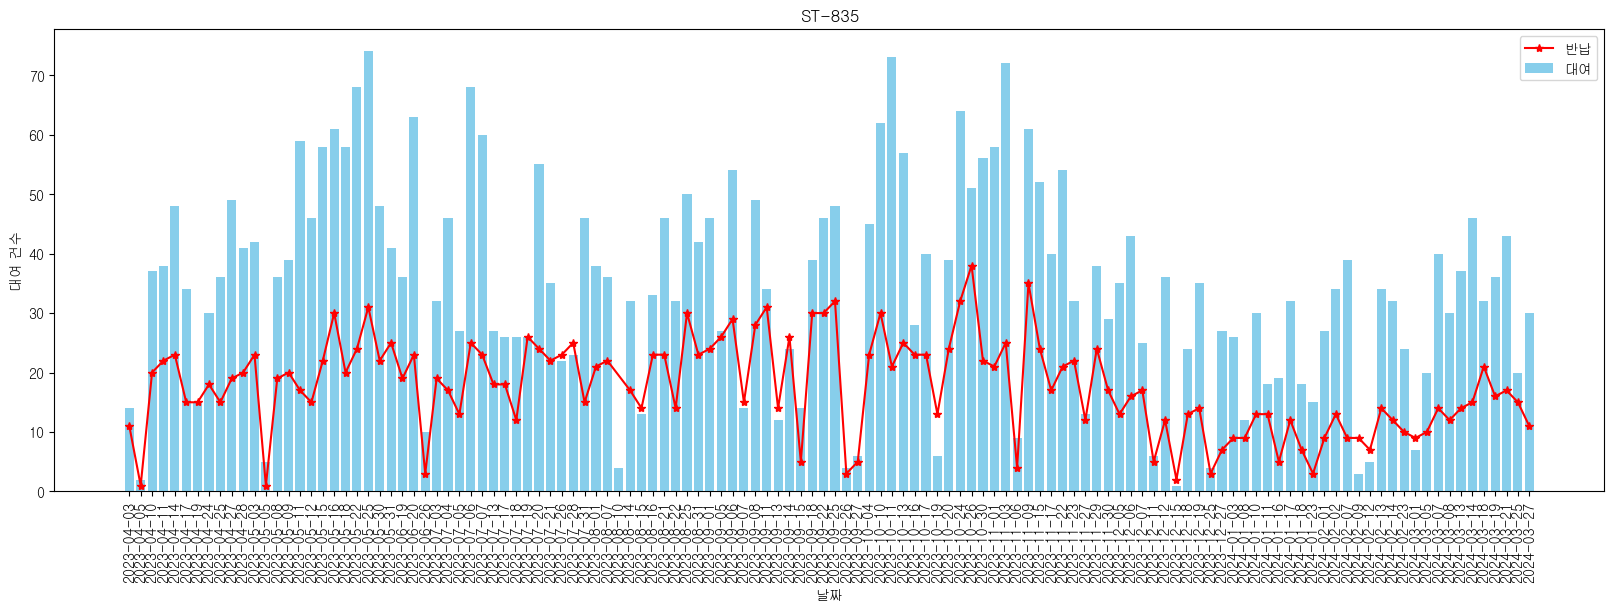

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')

강서_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')

강서_데이터_출근 = 강서_데이터[(강서_데이터['기준_시간대'] >= 600) & (강서_데이터['기준_시간대'] <= 1000)]
# 강서_데이터_퇴근 = 강서_데이터[(강서_데이터['기준_시간대'] >= 1700) & (강서_데이터['기준_시간대'] <= 2100)]

강서_대여소_ID_list= 강서_데이터['시작_대여소_ID'].unique()

대여소_ID = 'ST-835'

condition = 강서_데이터_출근['시작_대여소_ID'] == 대여소_ID

a = 강서_데이터_출근[condition].groupby('기준_날짜')['전체_건수'].sum()

condition2 = 강서_데이터_출근['종료_대여소_ID'] == 대여소_ID

b = 강서_데이터_출근[condition2].groupby('기준_날짜')['전체_건수'].sum()

fig, ax = plt.subplots(figsize = (20,6))
ax.bar(a.index, a.values, label = '대여', color = 'skyblue')
ax.plot(b.index, b.values, marker = '*', label = '반납', color = 'red', )

plt.title(대여소_ID)
plt.xlabel('날짜')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.legend(loc='best')